In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

In [5]:
import warnings 
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("zomato.csv")

In [7]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
df.shape

(51717, 17)

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
df=df.drop(['url', 'address', 
       'phone',  'dish_liked', 
        'reviews_list', 'menu_item',],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [12]:
df.duplicated().sum()

108

In [13]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [14]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [15]:
def handlerate(value):
    if(value=="NEW"  or value=="-"):
            return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
df['rate']=df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [16]:
df['rate'].fillna(df['rate'].mean(),inplace=True)
df['rate'].isnull().sum()

0

In [17]:
df.dropna(inplace=True)

In [18]:
df.rename(columns={"approx_cost(for two people)":"cost2plates","listed_in(type)":"Type"},inplace=True)

In [19]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'Type', 'listed_in(city)'],
      dtype='object')

In [20]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [22]:
df.drop(['listed_in(city)'],axis=1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [23]:
df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [24]:
def handlecomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)

df['cost2plates']=df['cost2plates'].apply(handlecomma)
df['cost2plates'].head()

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: cost2plates, dtype: float64

In [25]:
df['cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [26]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [27]:
rest_types=df['rest_type'].value_counts()
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [28]:
rest_typeslessthan1000=rest_types[rest_types<1000]

In [29]:
rest_typeslessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [30]:
def handle_rest_type(value):
    if(value in rest_typeslessthan1000):
        return 'others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(handle_rest_type)

In [31]:
df['rest_type']

0        Casual Dining
1        Casual Dining
2               others
3          Quick Bites
4        Casual Dining
             ...      
51712           others
51713           others
51714           others
51715           others
51716           others
Name: rest_type, Length: 51042, dtype: object

In [32]:
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [33]:
location=df['location'].value_counts()

In [34]:
location_lessthan300=location[location<300]

In [35]:
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [36]:
cuisines=df['cuisines'].value_counts()

In [37]:
cuisines_lessthan100=cuisines[cuisines<100]

In [38]:
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [39]:
df['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

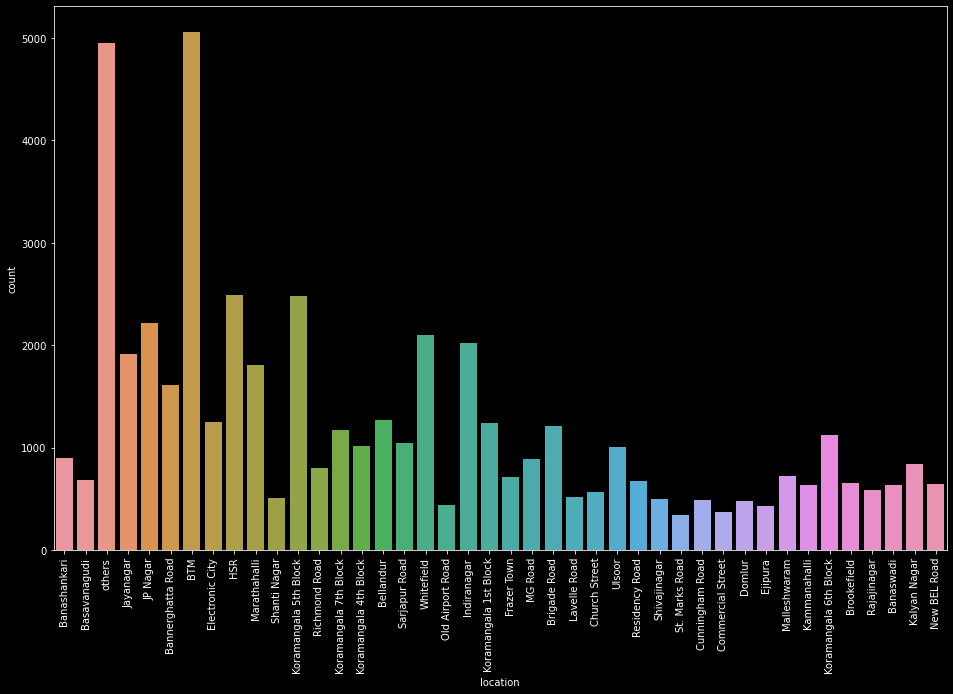

In [40]:
plt.figure(figsize=(16,10))
sns.countplot(df['location'],data=df)
plt.xticks(rotation=90)
plt.show()

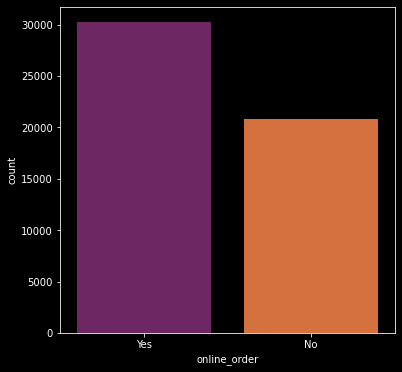

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(df['online_order'],palette='inferno')
plt.show()

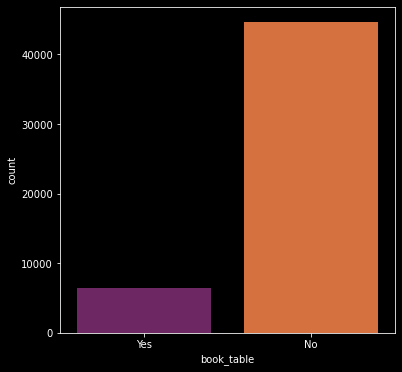

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(df['book_table'],palette='inferno')
plt.show()

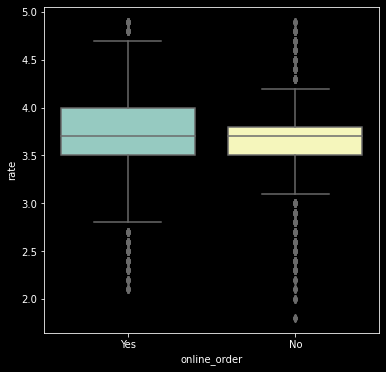

In [43]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()

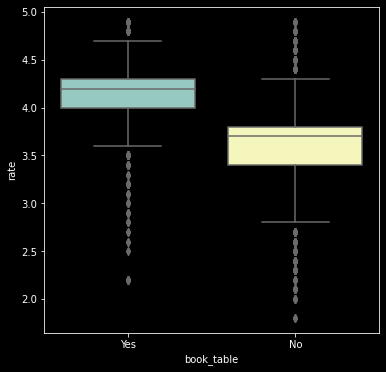

In [44]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df)
plt.show()

In [66]:
df1=df.groupby(['location','online_order'])['name'].count()

In [67]:
df1

location      online_order
BTM           No              1763
              Yes             3293
Banashankari  No               397
              Yes              505
Banaswadi     No               302
                              ... 
Ulsoor        Yes              622
Whitefield    No               986
              Yes             1119
others        No              2064
              Yes             2890
Name: name, Length: 84, dtype: int64

In [47]:
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')

In [48]:
df1=pd.pivot_table(df1,values=None,index='location',columns=['online_order'])

In [49]:
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<AxesSubplot:xlabel='location'>

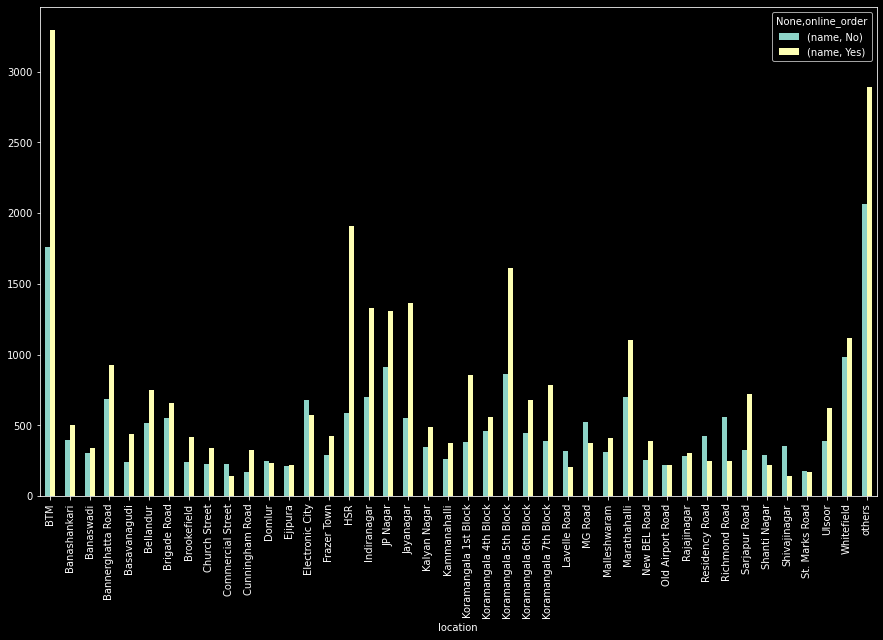

In [50]:
df1.plot(kind='bar',figsize=(15,9))

In [51]:
df2=df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None,index='location',columns='book_table')
df2

name       
book_table                 No    Yes
location                            
BTM                    4889.0  167.0
Banashankari            839.0   63.0
Banaswadi               632.0    8.0
Bannerghatta Road      1510.0   99.0
Basavanagudi            668.0   16.0
Bellandur              1170.0   98.0
Brigade Road           1034.0  176.0
Brookefield             582.0   74.0
Church Street           385.0  181.0
Commercial Street       370.0    NaN
Cunningham Road         315.0  175.0
Domlur                  427.0   55.0
Ejipura                 433.0    NaN
Electronic City        1148.0   98.0
Frazer Town             706.0    8.0
HSR                    2277.0  217.0
Indiranagar            1578.0  448.0
JP Nagar               1903.0  315.0
Jayanagar              1637.0  279.0
Kalyan Nagar            692.0  149.0
Kammanahalli            590.0   49.0
Koramangala 1st Block  1186.0   50.0
Koramangala 4th Block   695.0  322.0
Koramangala 5th Block  1787.0  692.0
Koramangala 6th Block  1015.0  112.0
Koramangala 7th Block  1012.0  162.0
Lavelle Road            290.0  228.0
MG Road                 546.0  347.0
Malleshwaram            632.0   89.0
Marathahalli           1642.0  163.0
New BEL Road            588.0   56.0
Old Airport Road        378.0   59.0
Rajajinagar             550.0   41.0
Residency Road          522.0  149.0
Richmond Road           687.0  116.0
Sarjapur Road           893.0  154.0
Shanti Nagar            451.0   57.0
Shivajinagar            475.0   23.0
St. Marks Road          219.0  124.0
Ulsoor                  834.0  177.0
Whitefield             1852.0  253.0
others                 4587.0  367.0

<AxesSubplot:xlabel='location'>

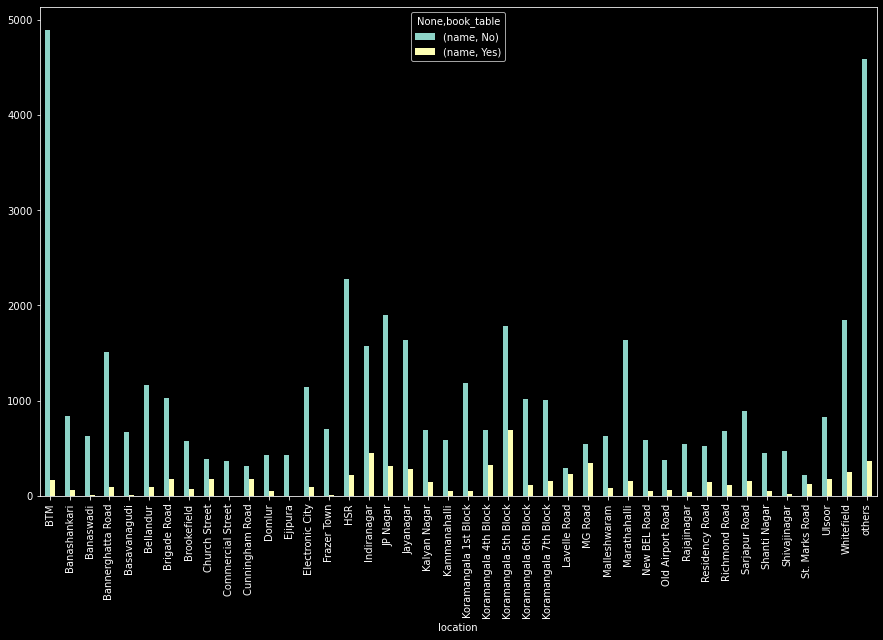

In [52]:
df2.plot(kind='bar',figsize=(15,9))

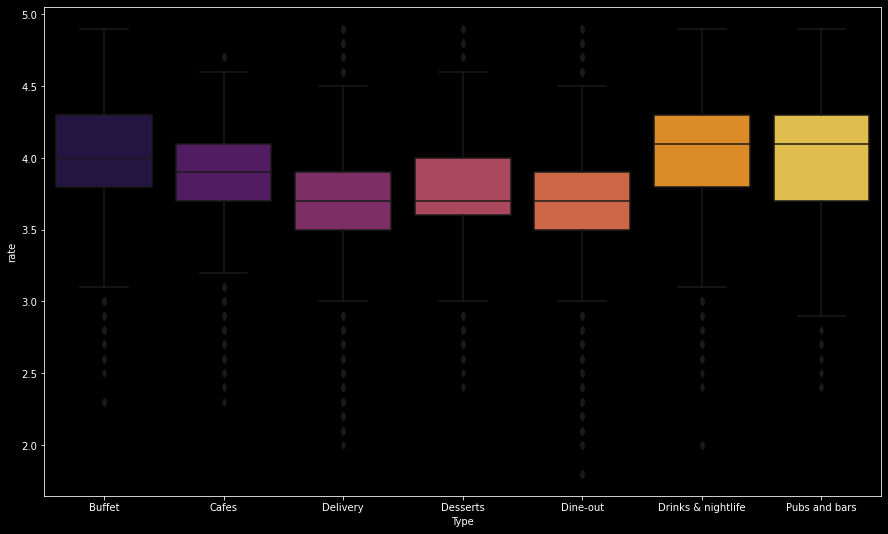

In [53]:
plt.figure(figsize=(15,9))
sns.boxplot(x='Type',y='rate',data=df,palette='inferno')
plt.show()

In [54]:
df3=df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_type.csv')
df3=pd.read_csv('location_type.csv')
df3=pd.pivot_table(df3,values=None,index=['location'],columns=['Type'],fill_value=0)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<AxesSubplot:xlabel='location'>

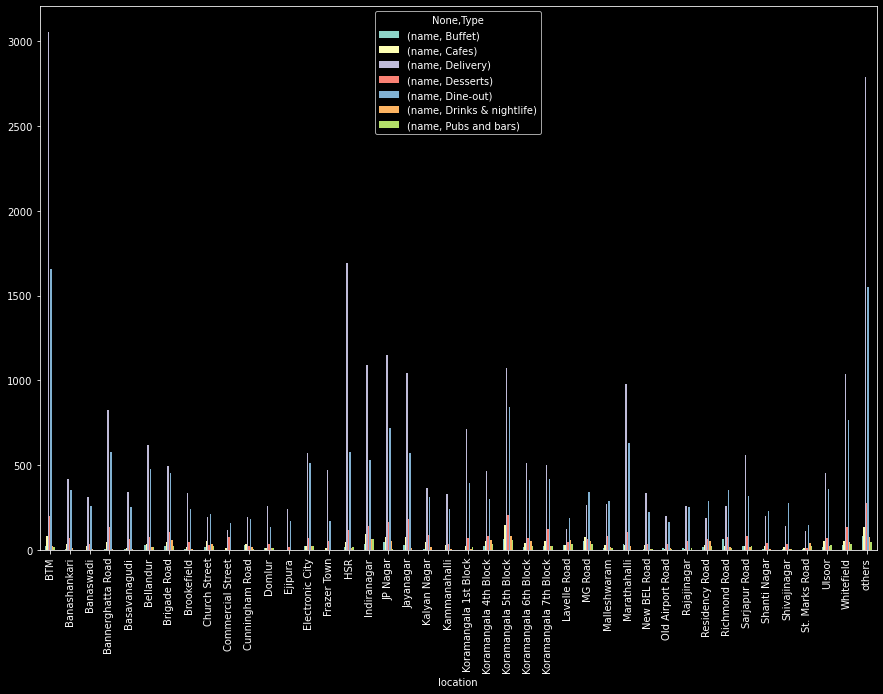

In [77]:
df3.plot(kind='bar',figsize=(15,10))

In [78]:
df4=df[['cuisines','votes']]
df4

,cuisines,votes
0,"North Indian, Mughlai, Chinese",775
1,others,787
2,others,918
3,"South Indian, North Indian",88
4,others,166
...,...,...
51712,Continental,27
51713,Finger Food,0
51714,Finger Food,0
51715,Finger Food,236


In [79]:
df4.drop_duplicates()

,cuisines,votes
0,"North Indian, Mughlai, Chinese",775
1,others,787
2,others,918
3,"South Indian, North Indian",88
4,others,166
...,...,...
51547,"South Indian, North Indian, Chinese",203
51555,"South Indian, Fast Food",8
51590,"North Indian, Chinese",515
51607,Finger Food,236


In [80]:
df5=df4.groupby(['cuisines'])['votes'].sum()

In [81]:
df5

cuisines
Andhra                                                 12299
Andhra, Biryani                                        40339
Arabian                                                16529
Bakery                                                 13148
Bakery, Desserts                                       45464
                                                      ...   
South Indian, North Indian                             14250
South Indian, North Indian, Chinese                    53586
South Indian, North Indian, Chinese, Street Food       33636
Street Food                                            11877
others                                              11542182
Name: votes, Length: 70, dtype: int64

In [82]:
df5=df5.to_frame()

In [83]:
df5

,votes
cuisines,
Andhra,12299
"Andhra, Biryani",40339
Arabian,16529
Bakery,13148
"Bakery, Desserts",45464
...,...
"South Indian, North Indian",14250
"South Indian, North Indian, Chinese",53586
"South Indian, North Indian, Chinese, Street Food",33636


In [84]:
df5=df5.sort_values('votes',ascending=False)

In [85]:
df5

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
...,...
"Biryani, South Indian",6473
"Kerala, South Indian",6083
"Fast Food, Beverages",5968


In [86]:
df5=df5.iloc[1:,:]

In [87]:
df5

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728
...,...
"Biryani, South Indian",6473
"Kerala, South Indian",6083
"Fast Food, Beverages",5968


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

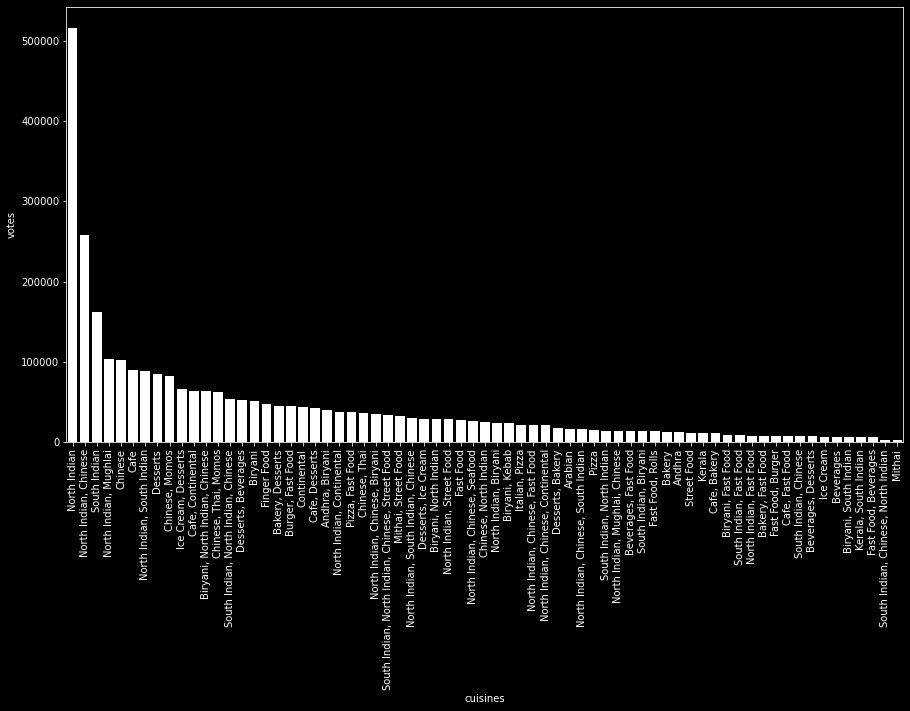

In [97]:
plt.figure(figsize=(15,8))
sns.barplot(df5.index,df5['votes'],color='white')
plt.xticks(rotation=90)

In [99]:
df6=df[['location','votes']]
df6

,location,votes
0,Banashankari,775
1,Banashankari,787
2,Banashankari,918
3,Banashankari,88
4,Basavanagudi,166
...,...,...
51712,Whitefield,27
51713,Whitefield,0
51714,Whitefield,0
51715,others,236


In [100]:
df6.drop_duplicates()

,location,votes
0,Banashankari,775
1,Banashankari,787
2,Banashankari,918
3,Banashankari,88
4,Basavanagudi,166
...,...,...
51328,Whitefield,152
51547,Whitefield,203
51606,others,848
51628,Bellandur,411


In [106]:
df7=df6.groupby(['location'])['votes'].sum()
df7=df7.to_frame()

In [108]:
df7=df7.sort_values('votes',ascending=False)
df7

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522
BTM,573668
others,563807
HSR,498322
Lavelle Road,495777


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

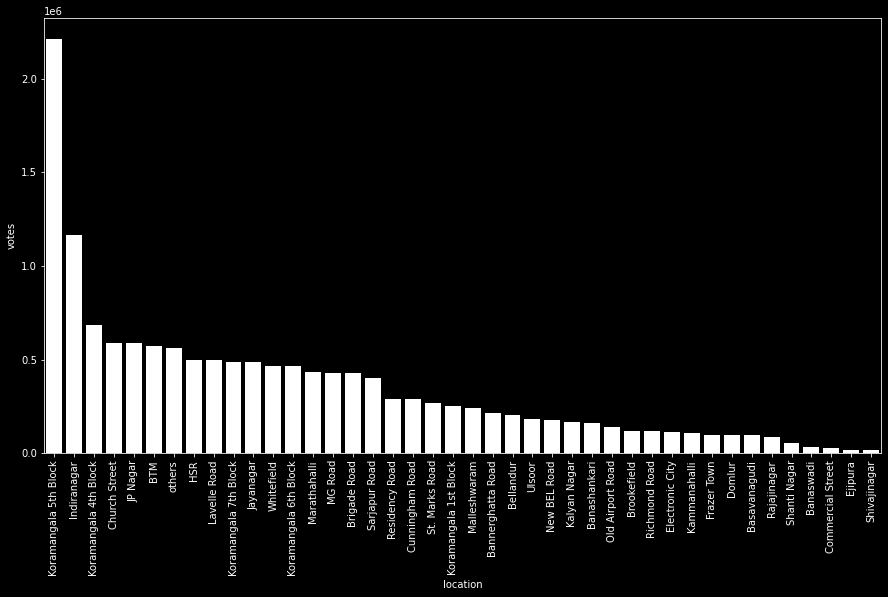

In [109]:
plt.figure(figsize=(15,8))
sns.barplot(df7.index,df7['votes'],color='white')
plt.xticks(rotation=90)